# Fraud Detection Data Exploration

This notebook performs comprehensive exploratory data analysis (EDA) on the credit card fraud detection dataset to understand the data characteristics, distributions, and patterns that will inform our preprocessing and modeling strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Starting Fraud Detection Data Exploration...")

Starting Fraud Detection Data Exploration...


## 1. Data Loading and Basic Information

In [2]:
# Load the dataset
import os
# Get the project root directory (parent of notebooks directory)
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, "data", "raw", "creditcard.csv")
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

In [3]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\n\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## 2. Target Variable Analysis (Class Distribution)

In [4]:
# Analyze the target variable
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Normal transactions: {class_counts[0]} ({class_percentages[0]:.2f}%)")
print(f"Fraudulent transactions: {class_counts[1]} ({class_percentages[1]:.2f}%)")
print(f"\nClass imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")

Class Distribution:
Normal transactions: 284315 (99.83%)
Fraudulent transactions: 492 (0.17%)

Class imbalance ratio: 577.9:1


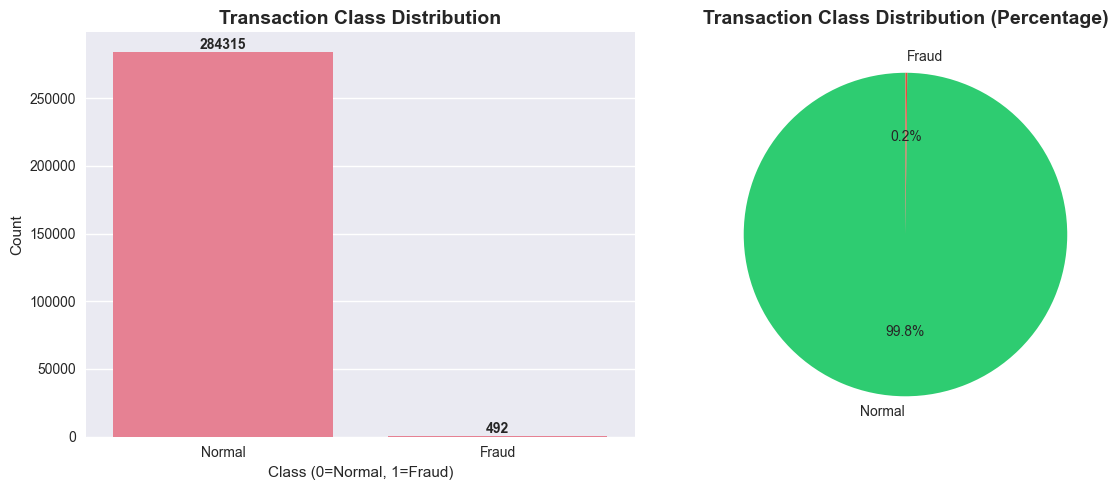

In [5]:
# Visualize class distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Add count labels on bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
colors = ['#2ecc71', '#e74c3c']
plt.pie(class_percentages.values, labels=['Normal', 'Fraud'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Feature Analysis

In [6]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {list(X.columns)}")

Number of features: 30
Feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


/var/folders/bs/wk3rp5yd4z3g6_l22q2kj3440000gn/T/ipykernel_46752/3531333281.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], labels=['Normal', 'Fraud'])
/var/folders/bs/wk3rp5yd4z3g6_l22q2kj3440000gn/T/ipykernel_46752/3531333281.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Time'], df[df['Class']==1]['Time']], labels=['Normal', 'Fraud'])


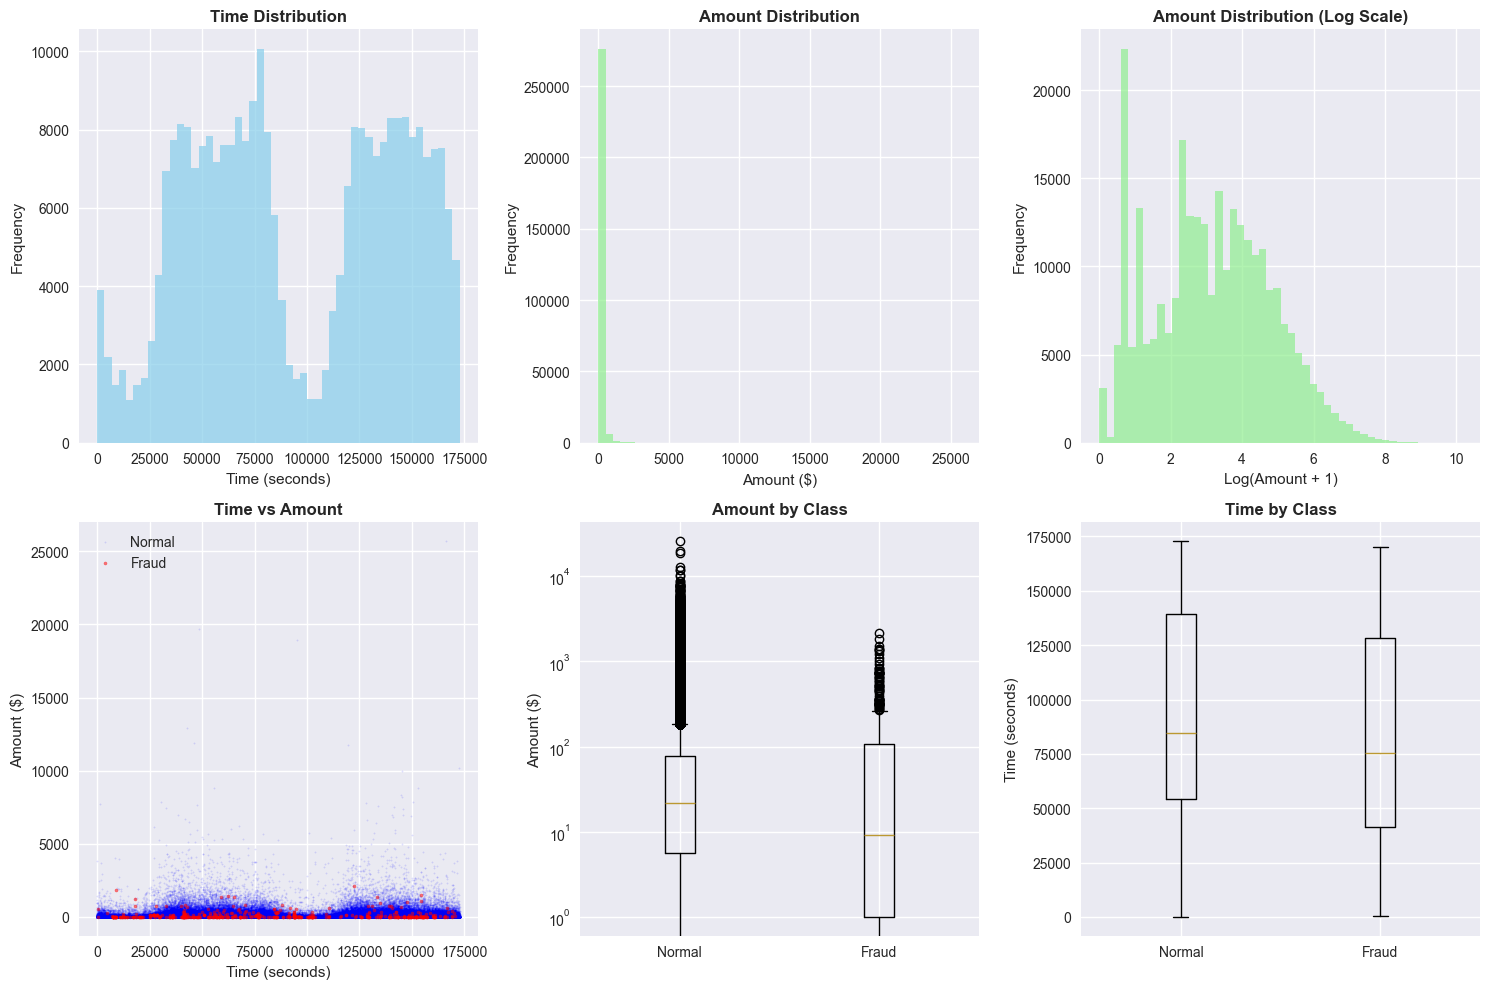

In [7]:
# Analyze Time and Amount features (the only non-PCA features)
plt.figure(figsize=(15, 10))

# Time distribution
plt.subplot(2, 3, 1)
plt.hist(df['Time'], bins=50, alpha=0.7, color='skyblue')
plt.title('Time Distribution', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

# Amount distribution
plt.subplot(2, 3, 2)
plt.hist(df['Amount'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Amount Distribution', fontweight='bold')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

# Log scale for Amount to see the distribution better
plt.subplot(2, 3, 3)
plt.hist(np.log1p(df['Amount']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Amount Distribution (Log Scale)', fontweight='bold')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')

# Time vs Amount scatter plot
plt.subplot(2, 3, 4)
plt.scatter(df[df['Class']==0]['Time'], df[df['Class']==0]['Amount'], alpha=0.1, color='blue', label='Normal', s=1)
plt.scatter(df[df['Class']==1]['Time'], df[df['Class']==1]['Amount'], alpha=0.5, color='red', label='Fraud', s=5)
plt.title('Time vs Amount', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount ($)')
plt.legend()

# Amount by class
plt.subplot(2, 3, 5)
plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], labels=['Normal', 'Fraud'])
plt.title('Amount by Class', fontweight='bold')
plt.ylabel('Amount ($)')
plt.yscale('log')

# Time by class
plt.subplot(2, 3, 6)
plt.boxplot([df[df['Class']==0]['Time'], df[df['Class']==1]['Time']], labels=['Normal', 'Fraud'])
plt.title('Time by Class', fontweight='bold')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

## 4. PCA Features Analysis (V1-V28)

In [8]:
# Analyze PCA features (V1-V28)
pca_features = [f'V{i}' for i in range(1, 29)]

print("PCA Features Statistics:")
print(df[pca_features].describe().T[['mean', 'std', 'min', 'max']].round(3))

PCA Features Statistics:


     mean    std      min      max
V1    0.0  1.959  -56.408    2.455
V2    0.0  1.651  -72.716   22.058
V3   -0.0  1.516  -48.326    9.383
V4    0.0  1.416   -5.683   16.875
V5    0.0  1.380 -113.743   34.802
V6    0.0  1.332  -26.161   73.302
V7   -0.0  1.237  -43.557  120.589
V8    0.0  1.194  -73.217   20.007
V9   -0.0  1.099  -13.434   15.595
V10   0.0  1.089  -24.588   23.745
V11   0.0  1.021   -4.797   12.019
V12  -0.0  0.999  -18.684    7.848
V13   0.0  0.995   -5.792    7.127
V14   0.0  0.959  -19.214   10.527
V15   0.0  0.915   -4.499    8.878
V16   0.0  0.876  -14.130   17.315
V17  -0.0  0.849  -25.163    9.254
V18   0.0  0.838   -9.499    5.041
V19   0.0  0.814   -7.214    5.592
V20   0.0  0.771  -54.498   39.421
V21   0.0  0.735  -34.830   27.203
V22  -0.0  0.726  -10.933   10.503
V23   0.0  0.624  -44.808   22.528
V24   0.0  0.606   -2.837    4.585
V25   0.0  0.521  -10.295    7.520
V26   0.0  0.482   -2.605    3.517
V27  -0.0  0.404  -22.566   31.612
V28  -0.0  0.330  -1

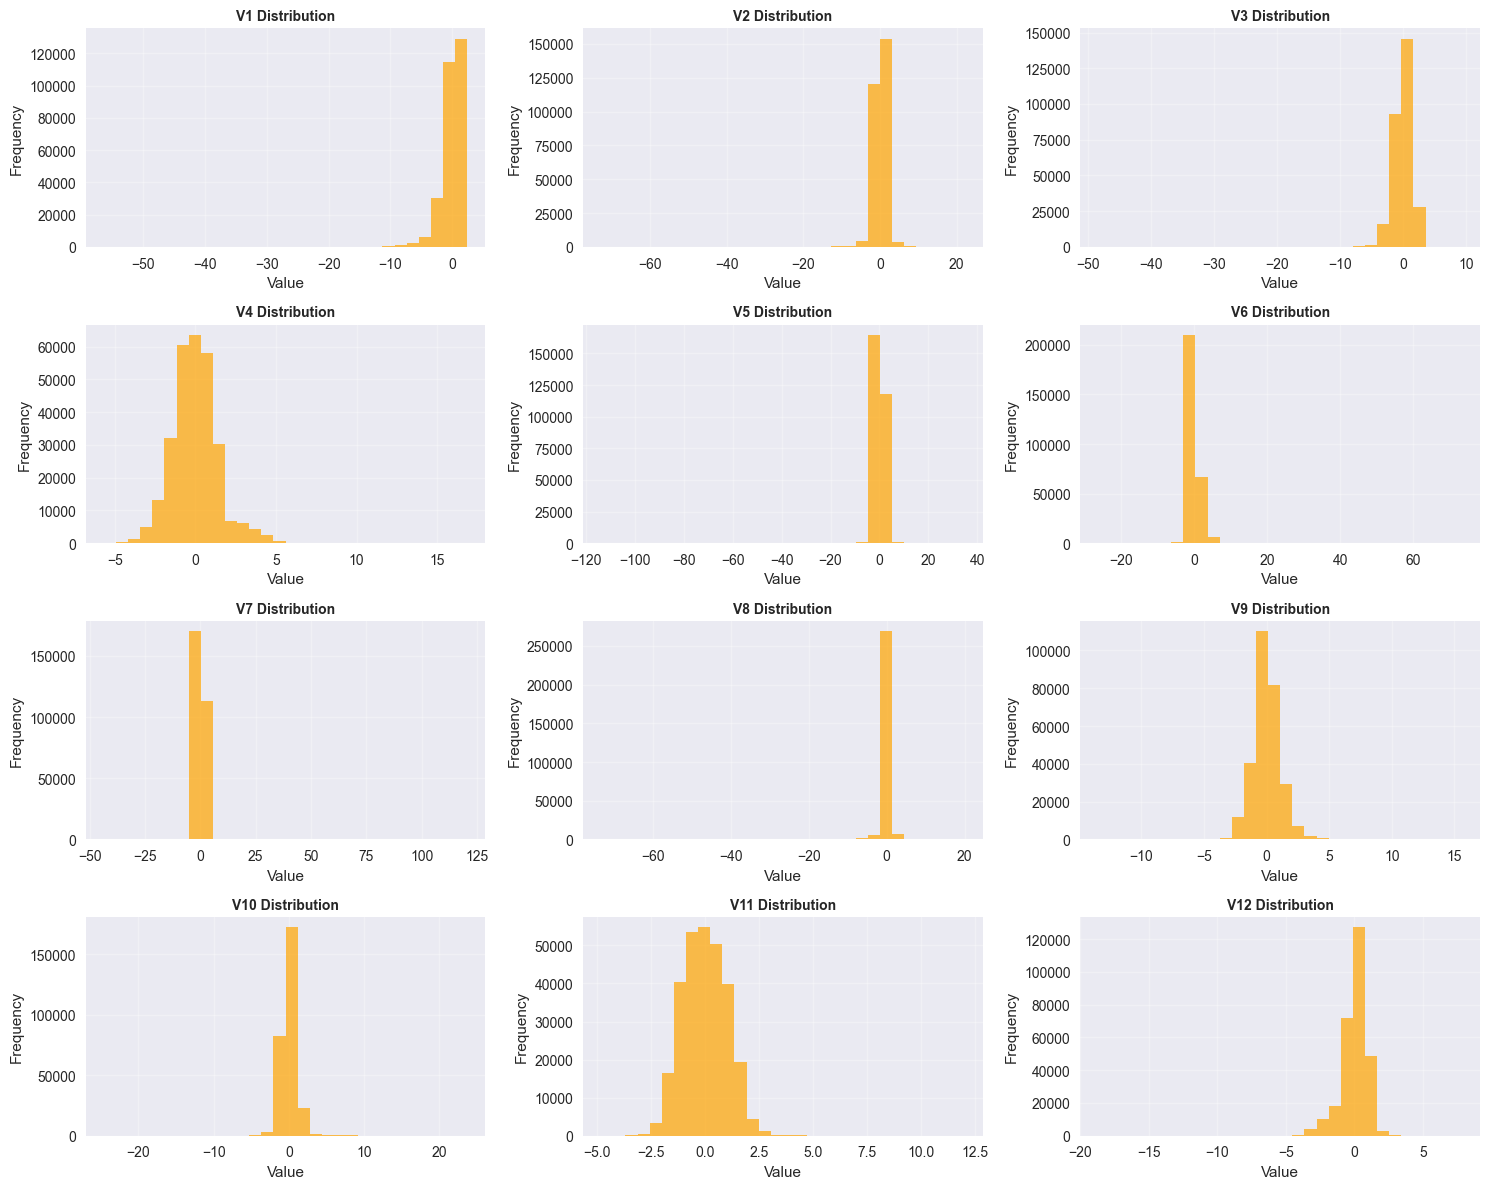

In [9]:
# Distribution of first 12 PCA features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(pca_features[:12], 1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=30, alpha=0.7, color='orange')
    plt.title(f'{feature} Distribution', fontsize=10, fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Feature Correlations

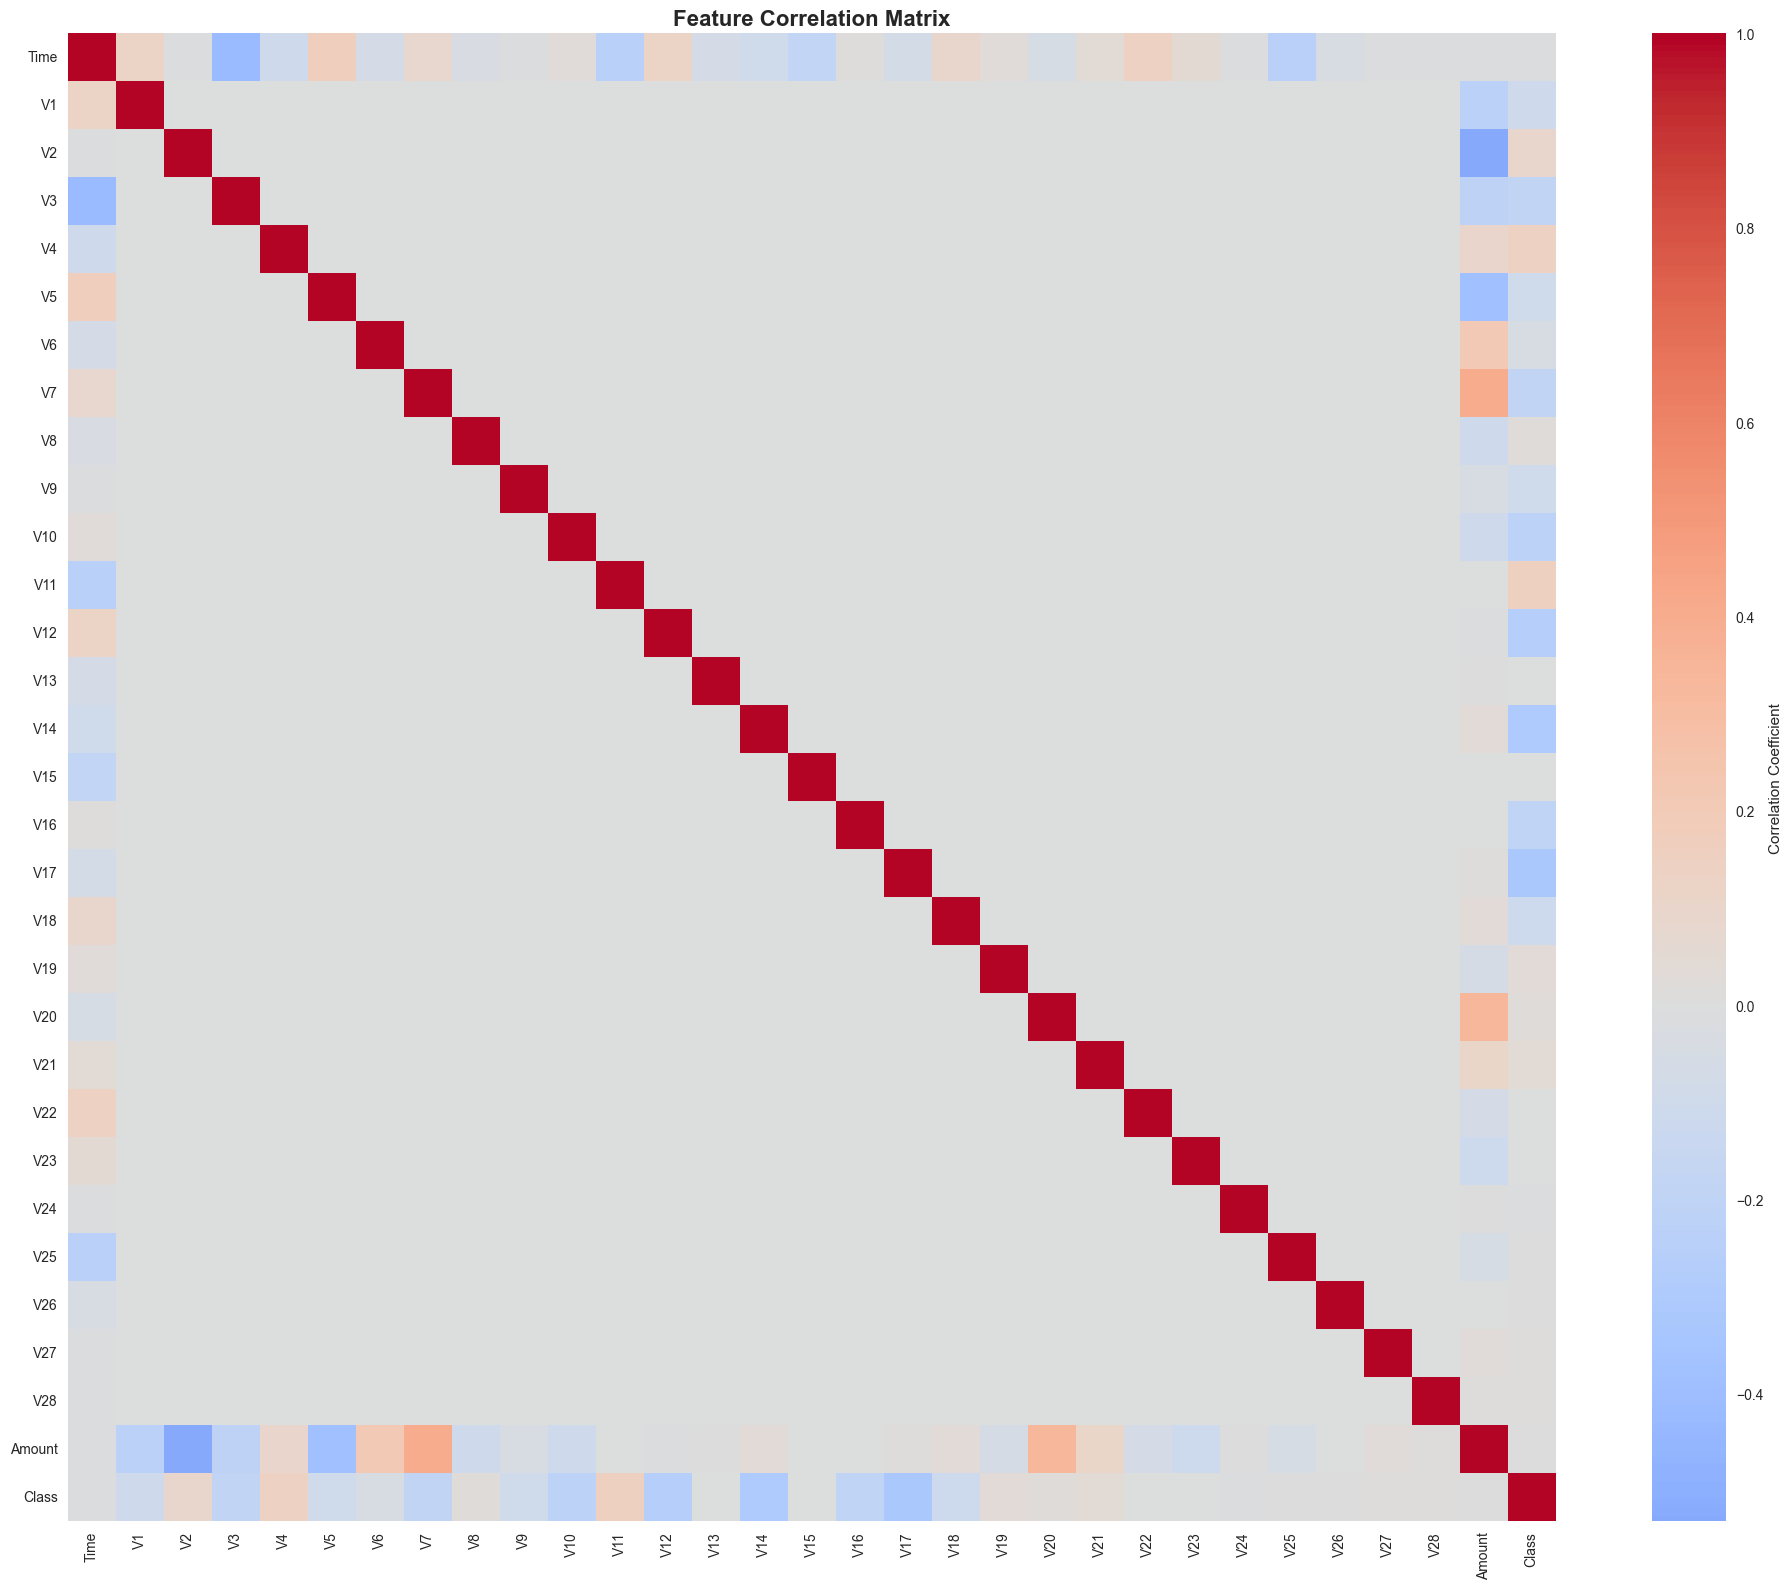

In [10]:
# Correlation matrix for all features
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=False, 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
# Correlation of features with the target variable
correlations_with_target = df.corr()['Class'].sort_values(ascending=False)

print("Features most correlated with fraud (Class=1):")
print(correlations_with_target.head(10))

print("\nFeatures most negatively correlated with fraud (Class=0):")
print(correlations_with_target.tail(10))

Features most correlated with fraud (Class=1):
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Features most negatively correlated with fraud (Class=0):
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


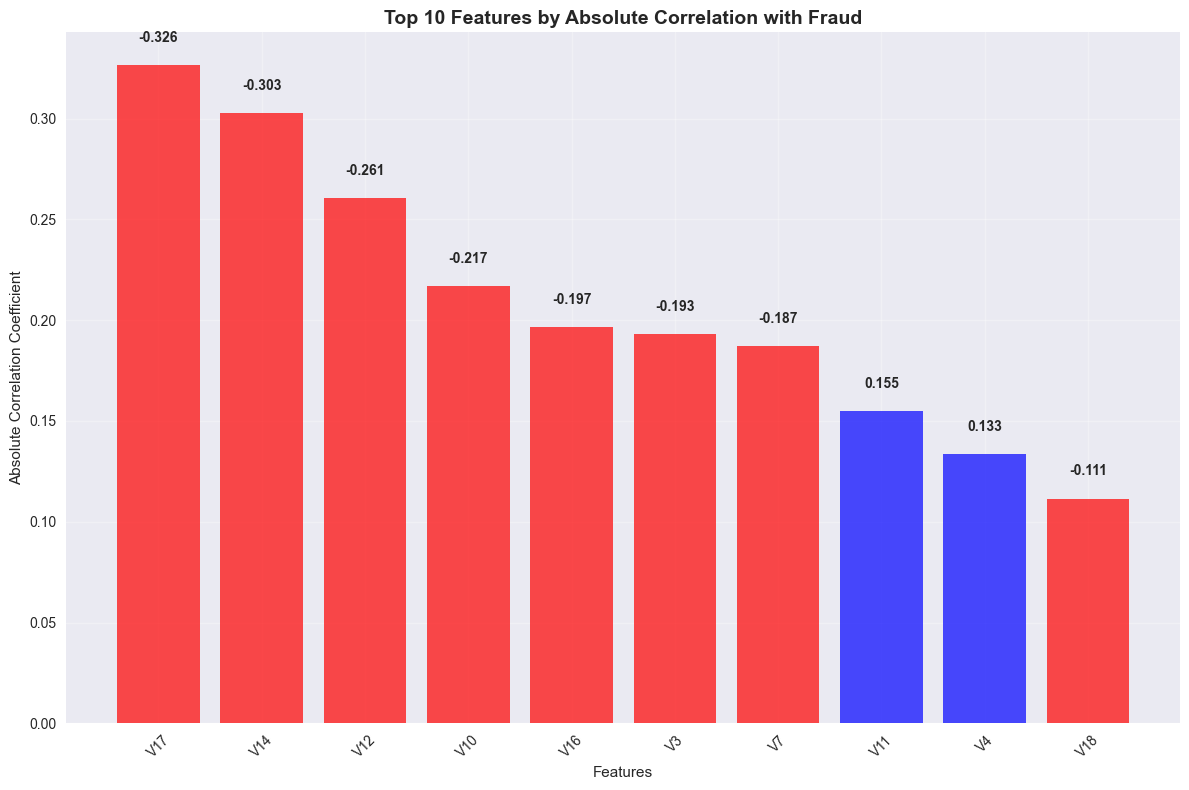

In [12]:
# Visualize correlations with target
plt.figure(figsize=(12, 8))

# Remove the target variable itself from correlations
target_correlations = correlations_with_target.drop('Class')

# Plot top 10 most correlated features
top_features = abs(target_correlations).sort_values(ascending=False).head(10)

colors = ['red' if target_correlations[feat] < 0 else 'blue' for feat in top_features.index]

plt.bar(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.xticks(range(len(top_features)), top_features.index, rotation=45)
plt.title('Top 10 Features by Absolute Correlation with Fraud', fontsize=14, fontweight='bold')
plt.ylabel('Absolute Correlation Coefficient')
plt.xlabel('Features')
plt.grid(True, alpha=0.3)

# Add correlation values on bars
for i, (feature, value) in enumerate(zip(top_features.index, top_features.values)):
    corr_value = target_correlations[feature]
    plt.text(i, value + 0.01, f'{corr_value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Missing Values and Data Quality

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset")
else:
    print(f"\n⚠️ Found {missing_values.sum()} missing values")

Missing values per column:
Series([], dtype: int64)

✅ No missing values found in the dataset


In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\n⚠️ Found {duplicates} duplicate rows")
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("\n✅ No duplicate rows found")

Duplicate rows: 1081

⚠️ Found 1081 duplicate rows
Removing duplicates...


Dataset shape after removing duplicates: (283726, 31)


## 7. Feature Distributions by Class

Normal transactions: 283253
Fraud transactions: 473


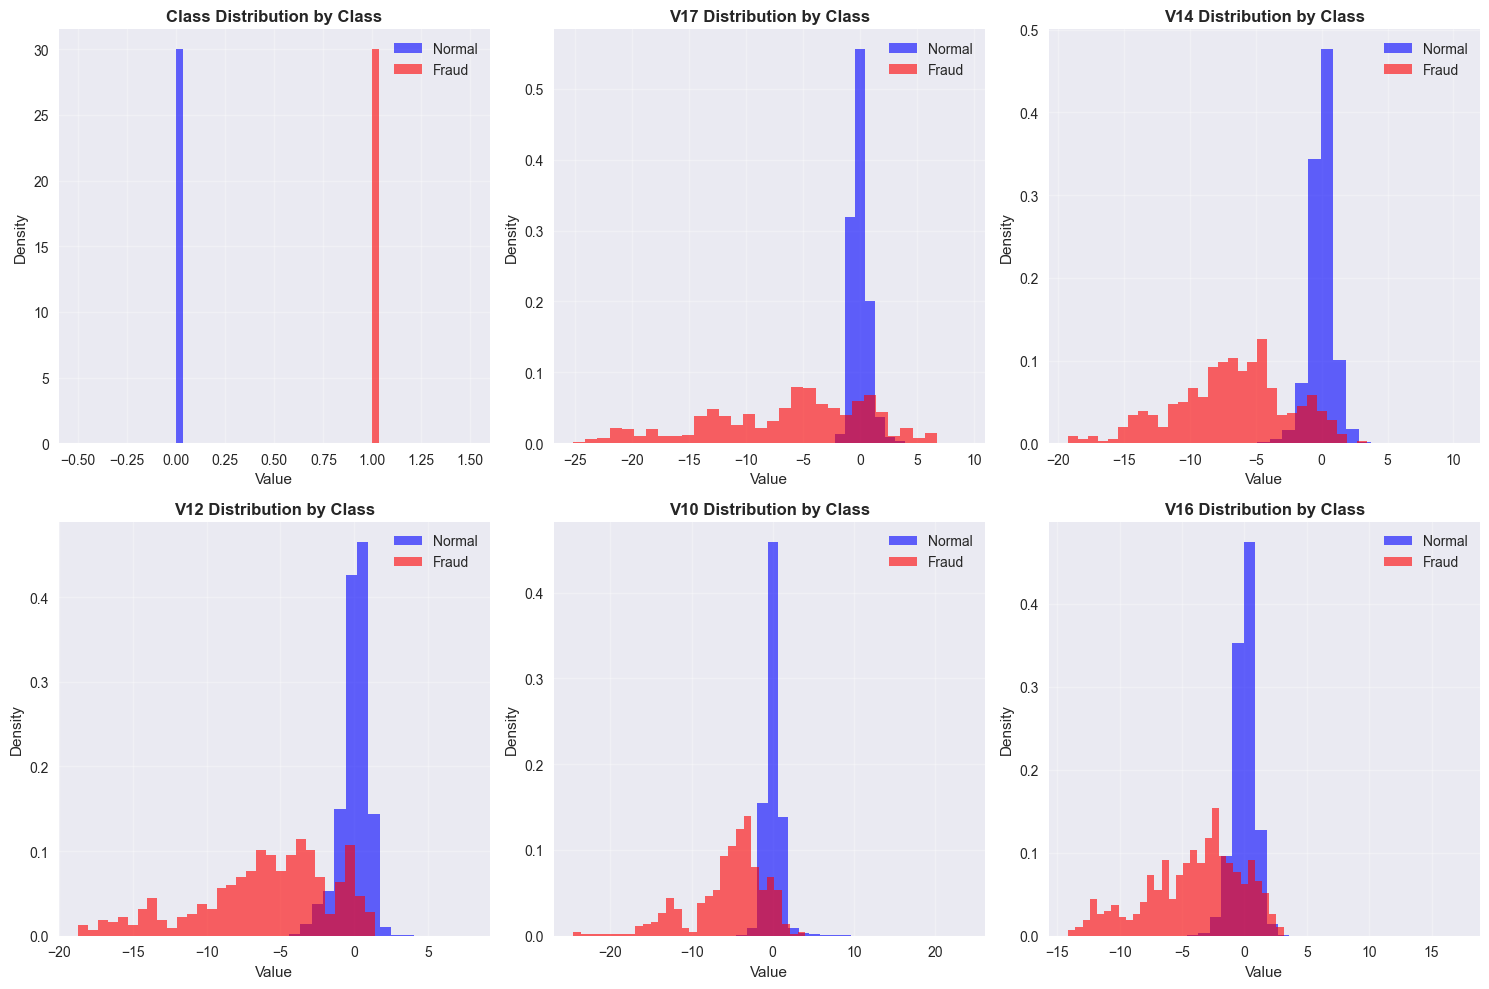

In [15]:
# Compare feature distributions between normal and fraud transactions
normal_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

print(f"Normal transactions: {len(normal_data)}")
print(f"Fraud transactions: {len(fraud_data)}")

# Distribution comparison for top correlated features
top_correlated_features = abs(correlations_with_target).sort_values(ascending=False).head(6).index.tolist()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(2, 3, i)
    
    # Normal transactions
    plt.hist(normal_data[feature], bins=30, alpha=0.6, label='Normal', color='blue', density=True)
    
    # Fraud transactions
    plt.hist(fraud_data[feature], bins=30, alpha=0.6, label='Fraud', color='red', density=True)
    
    plt.title(f'{feature} Distribution by Class', fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Summary and Insights

In [16]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   - Total transactions: {len(df):,}")
print(f"   - Features: {len(X.columns)}")
print(f"   - Target classes: 2 (Normal=0, Fraud=1)")

print(f"\n🎯 CLASS IMBALANCE:")
print(f"   - Normal transactions: {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"   - Fraud transactions: {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"   - Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")
print(f"   ⚠️  This is a highly imbalanced dataset!")

print(f"\n💰 AMOUNT ANALYSIS:")
print(f"   - Mean amount (Normal): ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"   - Mean amount (Fraud): ${df[df['Class']==1]['Amount'].mean():.2f}")
print(f"   - Max amount: ${df['Amount'].max():.2f}")
print(f"   - Min amount: ${df['Amount'].min():.2f}")

print(f"\n⏰ TIME ANALYSIS:")
print(f"   - Time range: {df['Time'].min():.0f}s to {df['Time'].max():.0f}s")
print(f"   - Total duration: {(df['Time'].max() - df['Time'].min())/3600:.1f} hours")

print(f"\n🔍 FEATURE INSIGHTS:")
print(f"   - PCA features (V1-V28): All standardized, mean ≈ 0")
print(f"   - Most correlated with fraud: {top_features.index[0]}")
print(f"   - Strongest negative correlation: {target_correlations.idxmin()}")

print(f"\n✅ DATA QUALITY:")
print(f"   - Missing values: {missing_values.sum()}")
print(f"   - Duplicate rows: {duplicates}")
print(f"   - Data type consistency: All numeric")

print("\n" + "="*60)
print("RECOMMENDATIONS FOR PREPROCESSING:")
print("="*60)
print("1. Handle class imbalance using:")
print("   - Undersampling majority class")
print("   - Oversampling minority class (SMOTE)")
print("   - Class weights in models")
print("\n2. Feature scaling:")
print("   - Amount feature needs scaling (wide range)")
print("   - Time feature may benefit from scaling")
print("   - PCA features already standardized")
print("\n3. Feature engineering opportunities:")
print("   - Time-based features (hour of day, day of week)")
print("   - Amount-based features (log transformation)")
print("   - Interaction features between top correlated variables")
print("\n4. Model considerations:")
print("   - Use metrics suitable for imbalanced data (AUC-ROC, Precision-Recall)")
print("   - Focus on recall to minimize false negatives (missed fraud)")
print("   - Consider cost-sensitive learning")

EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   - Total transactions: 283,726
   - Features: 30
   - Target classes: 2 (Normal=0, Fraud=1)

🎯 CLASS IMBALANCE:
   - Normal transactions: 284,315 (99.83%)
   - Fraud transactions: 492 (0.17%)
   - Imbalance ratio: 577.9:1
   ⚠️  This is a highly imbalanced dataset!

💰 AMOUNT ANALYSIS:
   - Mean amount (Normal): $88.41
   - Mean amount (Fraud): $123.87
   - Max amount: $25691.16
   - Min amount: $0.00

⏰ TIME ANALYSIS:
   - Time range: 0s to 172792s
   - Total duration: 48.0 hours

🔍 FEATURE INSIGHTS:
   - PCA features (V1-V28): All standardized, mean ≈ 0
   - Most correlated with fraud: V17
   - Strongest negative correlation: V17

✅ DATA QUALITY:
   - Missing values: 0
   - Duplicate rows: 1081
   - Data type consistency: All numeric

RECOMMENDATIONS FOR PREPROCESSING:
1. Handle class imbalance using:
   - Undersampling majority class
   - Oversampling minority class (SMOTE)
   - Class weights in models

2. Feature scaling:
   -